Clustering Analysis: Implement K-Means clustering on Iris.csv
dataset. Determine the number of clusters
using the elbow method.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
# Load the Iris dataset
df = pd.read_csv('/content/IRIS.csv')

# Check the first few rows
print(df.head())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [8]:
# Drop the 'Id' column if it exists
# df = df.drop(columns=['Id'])

# Extract features (without the 'Species' column)
X = df.drop(columns=['species'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)




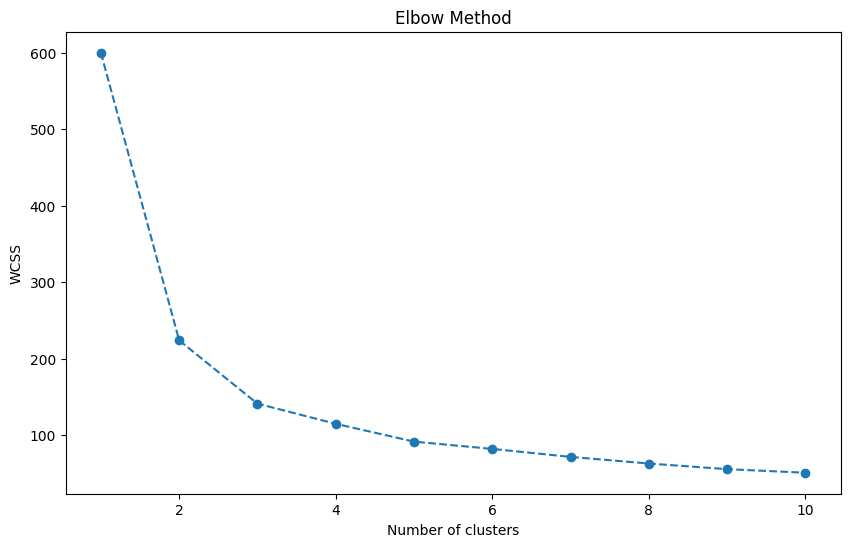

In [9]:
# Apply the Elbow Method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

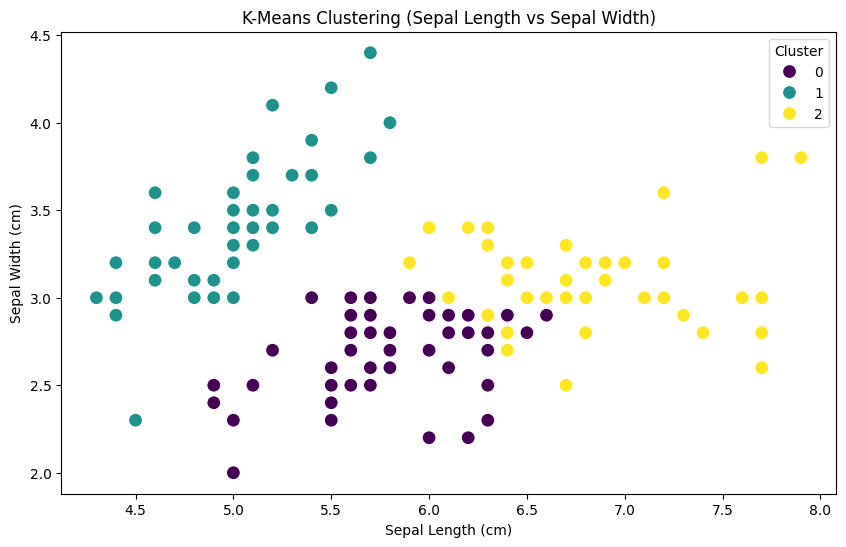

In [12]:


# Perform KMeans clustering with the optimal number of clusters (k=3)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original DataFrame
df['Cluster'] = clusters

# Visualize the clusters using a scatter plot (sepal length vs sepal width)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['sepal_length'], y=df['sepal_width'], hue=df['Cluster'], palette='viridis', s=100)
plt.title('K-Means Clustering (Sepal Length vs Sepal Width)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


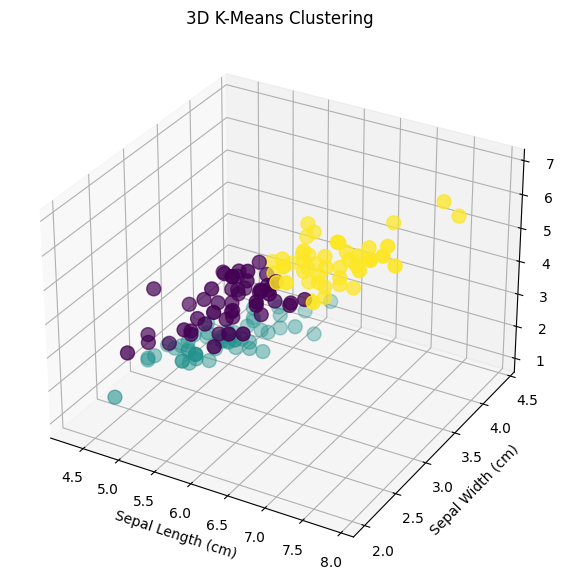

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the clusters
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use 'SepalLengthCm', 'SepalWidthCm', and 'PetalLengthCm' for 3D visualization
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'], c=df['Cluster'], cmap='viridis', s=100)

ax.set_title('3D K-Means Clustering')
ax.set_xlabel('Sepal Length (cm)')
ax.set_ylabel('Sepal Width (cm)')
ax.set_zlabel('Petal Length (cm)')
plt.show()


In [14]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,Cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
